In [128]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [148]:
data = pd.read_csv('/content/mcdonalds.csv')

In [149]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [150]:
data.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [132]:
data.shape

(1453, 15)

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [134]:
print(pd.isnull(data).sum()) 

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [135]:
data.describe() 

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [136]:
data.nunique()

yummy              2
convenient         2
spicy              2
fattening          2
greasy             2
fast               2
cheap              2
tasty              2
expensive          2
healthy            2
disgusting         2
Like              11
Age               54
VisitFrequency     6
Gender             2
dtype: int64

In [137]:
bin = data.iloc[:,0:11]


In [138]:
bin

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [151]:
x = pd.get_dummies(bin)


In [152]:
x = x.drop(x.columns[0::2], axis = 1)


In [153]:
x.mean()

yummy_Yes         0.552650
convenient_Yes    0.907777
spicy_Yes         0.093599
fattening_Yes     0.867171
greasy_Yes        0.526497
fast_Yes          0.900206
cheap_Yes         0.598761
tasty_Yes         0.644184
expensive_Yes     0.357880
healthy_Yes       0.198899
disgusting_Yes    0.242946
dtype: float64

In [154]:
from sklearn.manifold import TSNE
m = TSNE(learning_rate = 50)

In [155]:
tsne_features = m.fit_transform(x)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [156]:
tsne_features[1:4, : ]

array([[17.560463  ,  5.0997405 ],
       [-0.19300781,  8.42273   ],
       [20.19157   , 10.162223  ]], dtype=float32)

In [157]:
x['x'] = tsne_features[:,0]
x['y'] = tsne_features[:,1]

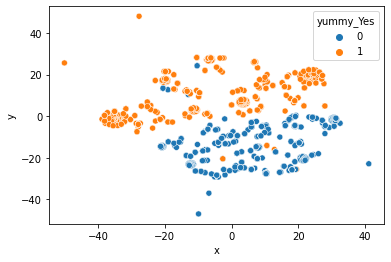

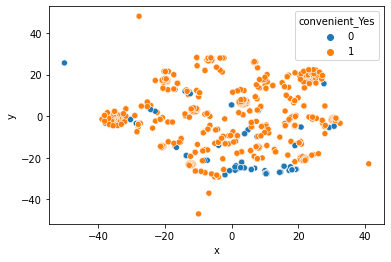

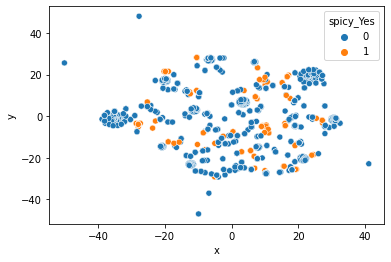

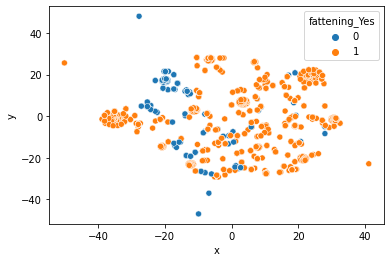

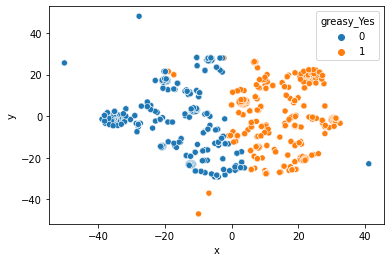

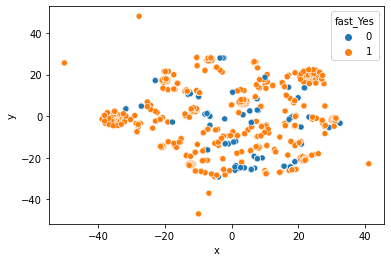

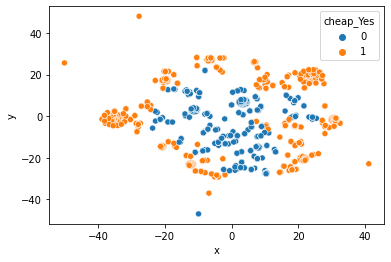

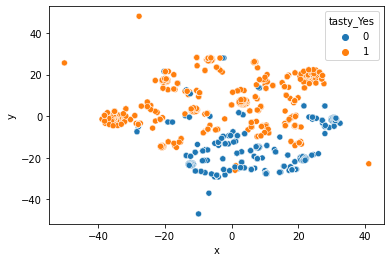

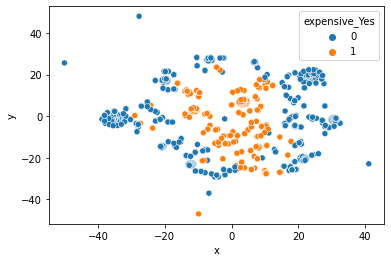

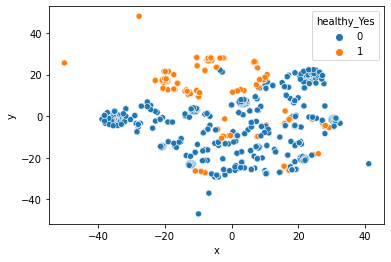

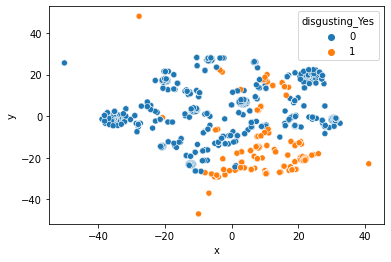

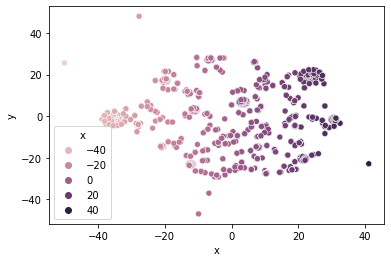

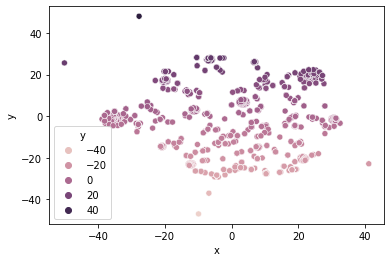

In [146]:
for feature in x.columns:
  sns.scatterplot(x="x", y="y",hue = feature, data = x)
  plt.show()

###Categorical Encoding:
Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the different models.


In [158]:
final = {'Yes':1, 'No':0}
final1 = {'Male':1, 'Female':2}
final2 = {'Every three months':3,'Once a year':4,'Once a month':5,'Once a week':6,'More than once a week':7,'Never':8}
final3 = {'I love it!+5':5,'I hate it!-5':-5,'-4':-4,'-3':-3,'-2':-2,'-1':-1,'0':0,'+1':1,'+2':2,'+3':3,'+4':4}
data["yummy"] = data.yummy.map(final)
data["convenient"] = data.convenient.map(final)
data["spicy"] = data.spicy.map(final)
data["fattening"] = data.fattening.map(final)
data["greasy"] = data.greasy.map(final)
data["fast"] = data.fast.map(final)
data["cheap"] = data.cheap.map(final)
data["tasty"] = data.tasty.map(final)
data["expensive"] = data.expensive.map(final)
data["healthy"] = data.healthy.map(final)
data["disgusting"] = data.disgusting.map(final)
data["Like"] = data.Like.map(final3)

data["VisitFrequency"] = data.VisitFrequency.map(final2)
data["Gender"] = data.Gender.map(final1)

data

#yummy	convenient	spicy	fattening	greasy	fast	cheap	tasty	expensive	healthy	disgusting

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,3,2
1,1,1,0,1,1,1,1,1,1,0,0,2,51,3,2
2,0,1,1,1,1,1,0,1,1,1,0,1,62,3,2
3,1,1,0,1,1,1,1,1,0,0,1,4,69,6,2
4,0,1,0,1,1,1,1,0,0,1,0,2,49,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,4,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,6,2
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,5,2
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,3,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d1afb1610>,
      dtype=object)

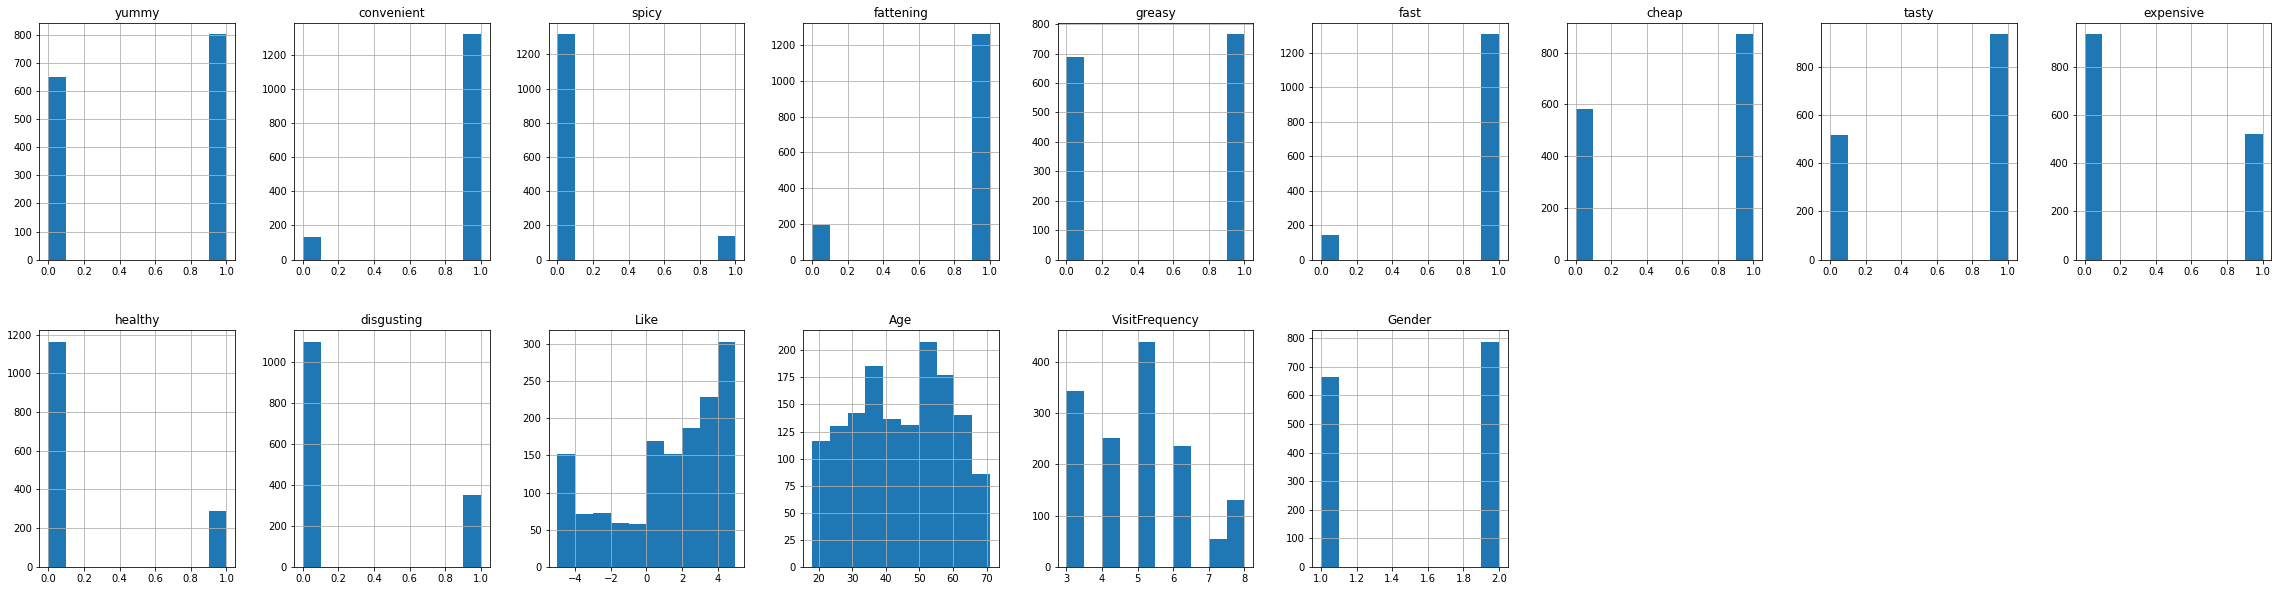

In [159]:
data.hist(layout=(2,9), figsize=(40,10))

In [160]:
features = data.columns
features

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

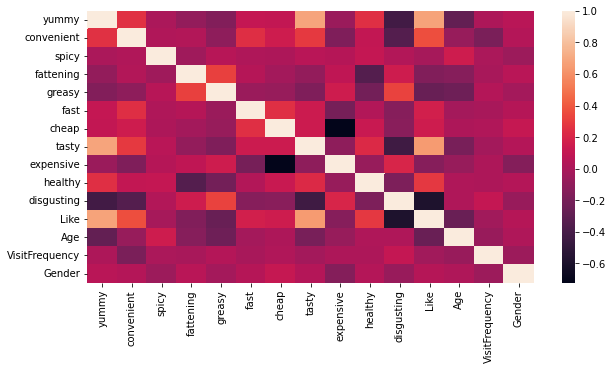

In [161]:
corr=data.corr()
plt.figure(1, figsize=(10,5))
sns.heatmap(corr)

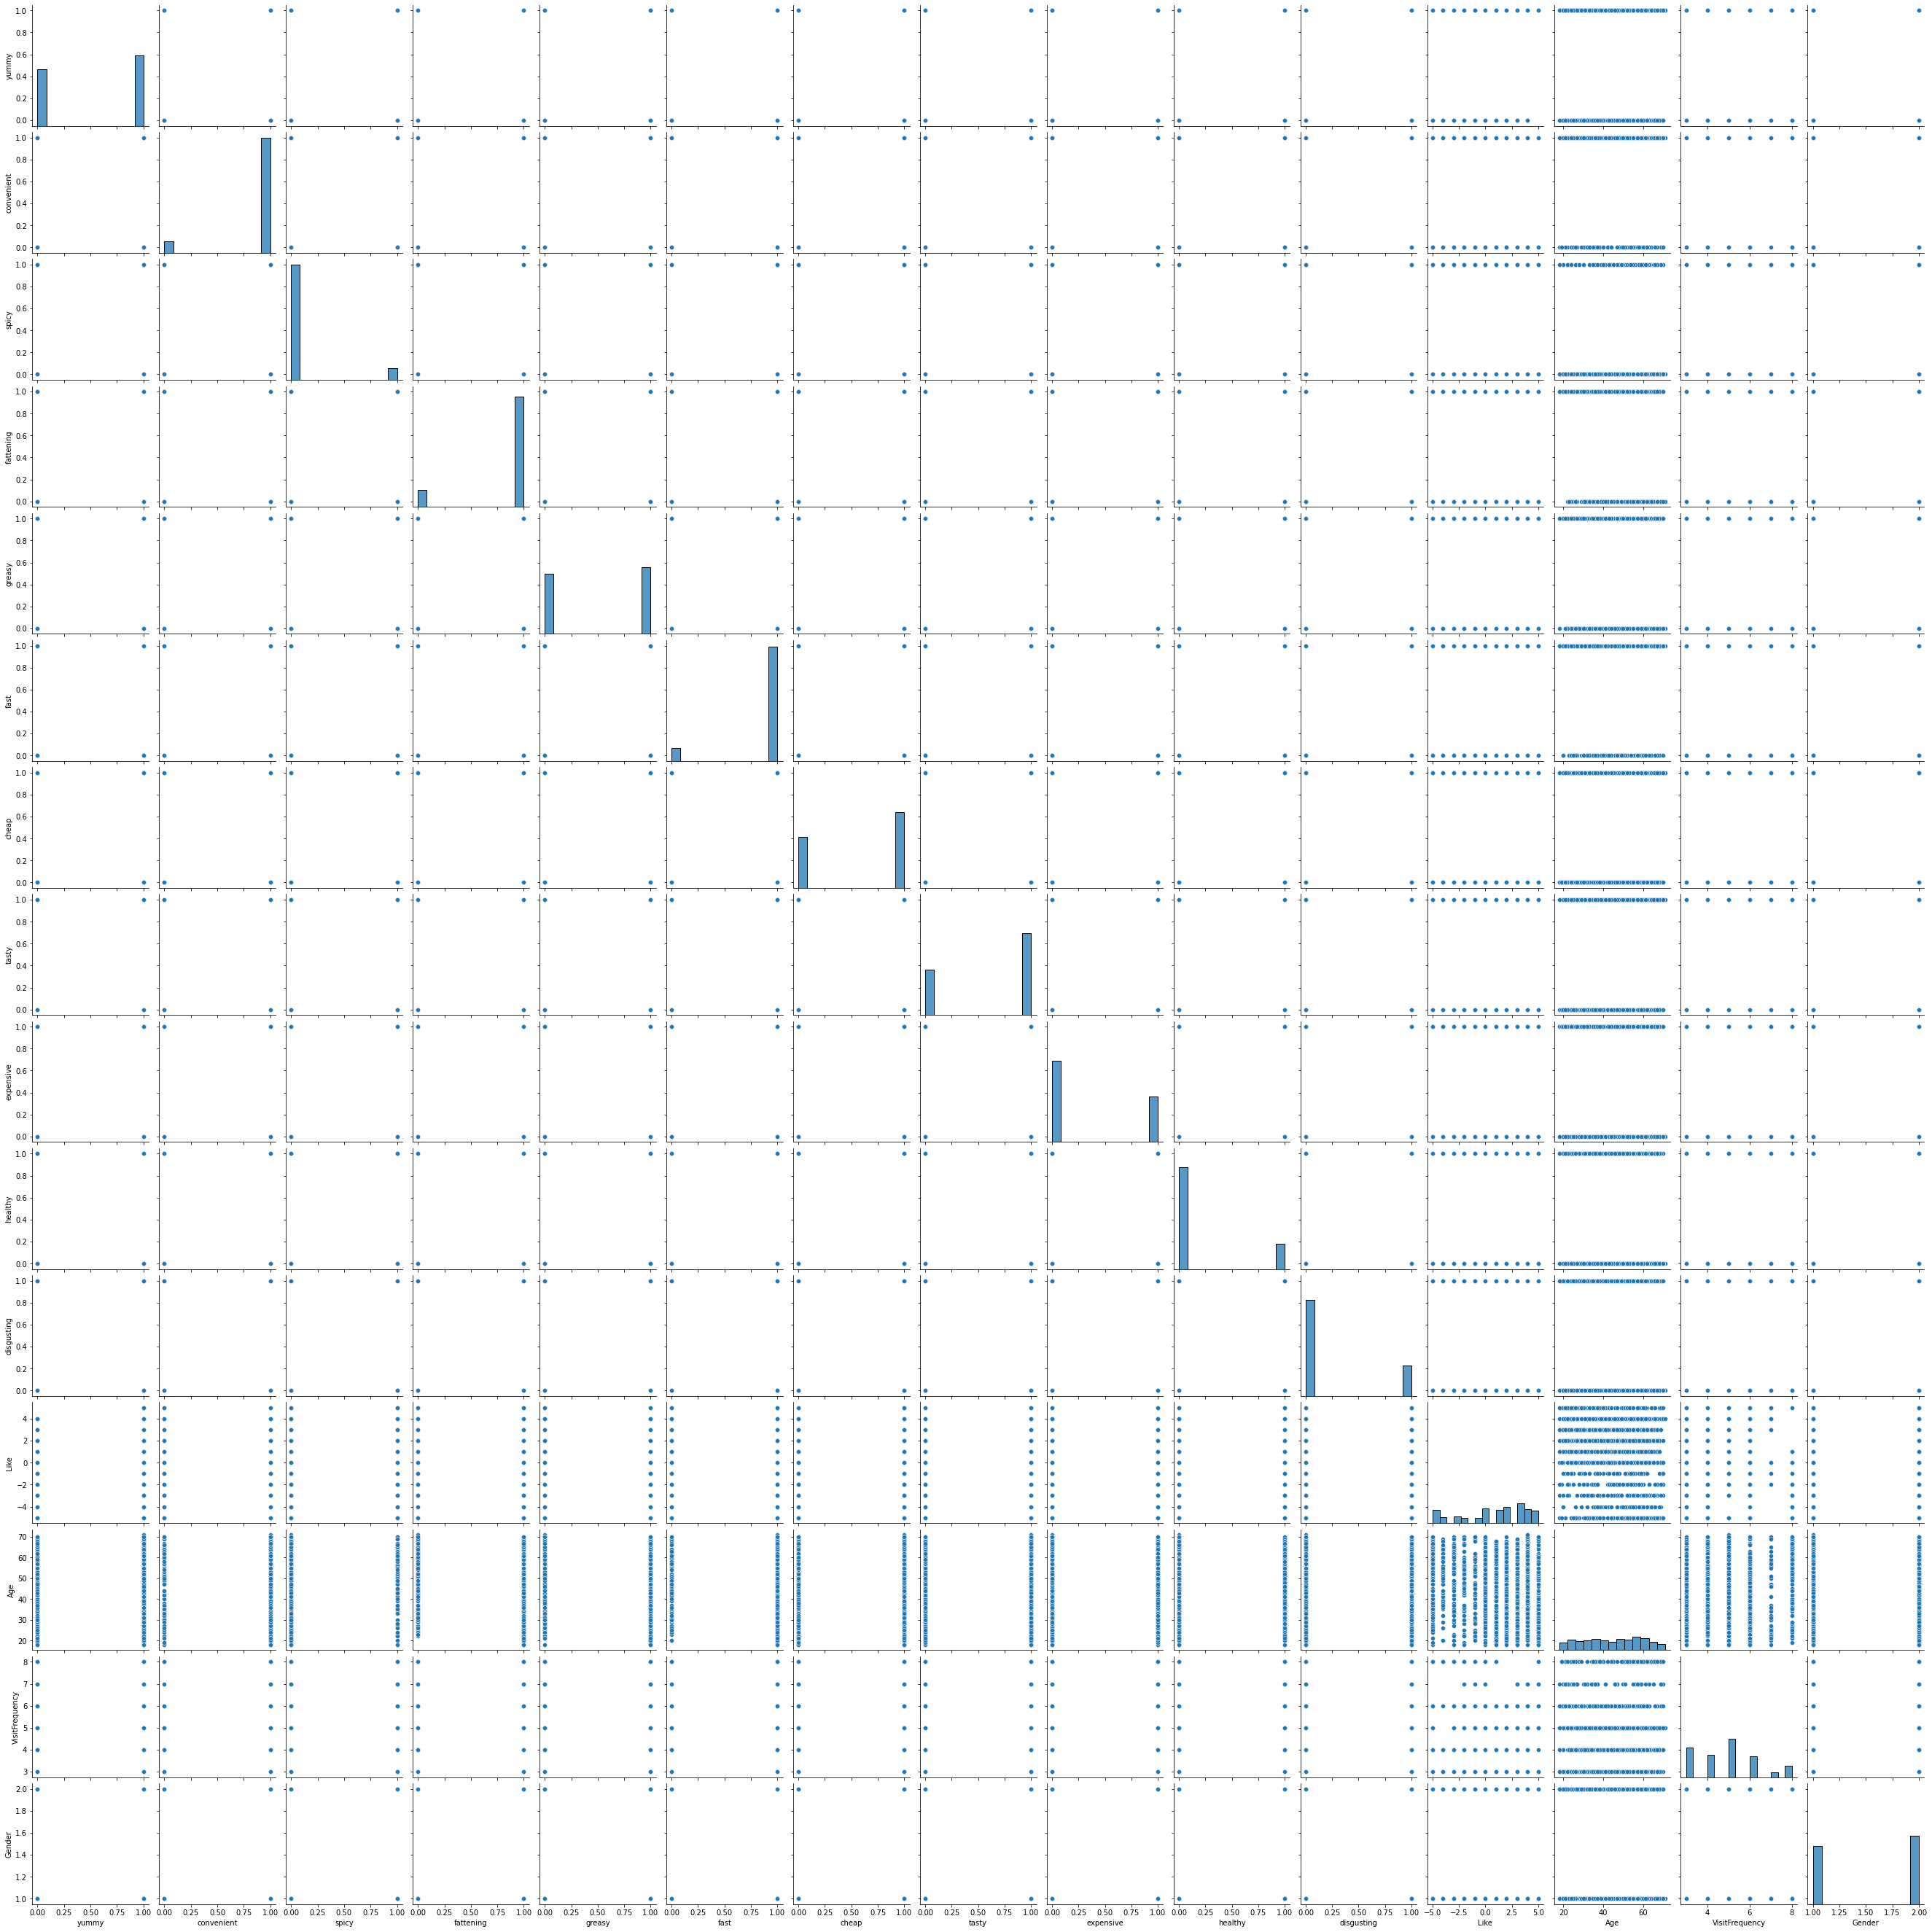

In [162]:
sns.pairplot(data)

####FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [163]:
data.loc[data['cheap'] == '', 'cheap'] = 0
data['cheap']=data['cheap'].astype(float)

In [164]:
# Let's scale the data first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data= scaler.fit_transform(data)
normalized_data

array([[-1.11147857,  0.31873518, -0.32134871, ...,  1.15325815,
        -1.25054837,  0.918645  ],
       [ 0.89970246,  0.31873518, -0.32134871, ...,  0.44983942,
        -1.25054837,  0.918645  ],
       [-1.11147857,  0.31873518,  3.11188424, ...,  1.22360002,
        -1.25054837,  0.918645  ],
       ...,
       [ 0.89970246,  0.31873518, -0.32134871, ...,  0.5201813 ,
         0.09242782,  0.918645  ],
       [ 0.89970246,  0.31873518, -0.32134871, ..., -0.2535793 ,
        -1.25054837, -1.08855979],
       [-1.11147857,  0.31873518, -0.32134871, ..., -1.0273399 ,
        -1.25054837, -1.08855979]])

In [165]:
normalized_data.shape

(1453, 15)

In [166]:
# Compute 'within cluster sum of squares' metric for a range of k clusters
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
wcss_values = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(normalized_data)
  wcss_values.append(kmeans.inertia_)

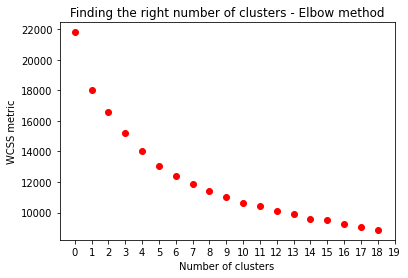

In [167]:
plt.plot(wcss_values,'ro')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS metric')
plt.title('Finding the right number of clusters - Elbow method')
plt.xticks(ticks=range(0,20))
plt.show()

#Now Appliyng K-Means Method

In [168]:
kmeans=KMeans(8)
kmeans.fit(normalized_data)
kmeans.cluster_centers_.shape

(8, 15)

In [169]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[data.columns])

In [170]:
labels = kmeans.labels_
labels

array([6, 5, 0, ..., 5, 2, 1], dtype=int32)

In [171]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7}

In [172]:
labels.shape

(1453,)

In [173]:
# concatenate the clusters labels to our original dataframe
data_with_centroids = pd.concat([data, pd.DataFrame({'centroid':labels})], axis=1)
data_with_centroids  

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,centroid
0,0,1,0,1,0,1,1.0,0,1,0,0,-3,61,3,2,6
1,1,1,0,1,1,1,1.0,1,1,0,0,2,51,3,2,5
2,0,1,1,1,1,1,0.0,1,1,1,0,1,62,3,2,0
3,1,1,0,1,1,1,1.0,1,0,0,1,4,69,6,2,3
4,0,1,0,1,1,1,1.0,0,0,1,0,2,49,5,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0.0,0,1,0,1,-5,47,4,1,1
1449,1,1,0,1,0,0,1.0,1,0,1,0,2,36,6,2,3
1450,1,1,0,1,0,1,0.0,1,1,0,0,3,52,5,2,5
1451,1,1,0,0,0,1,1.0,1,0,1,0,4,41,3,1,2


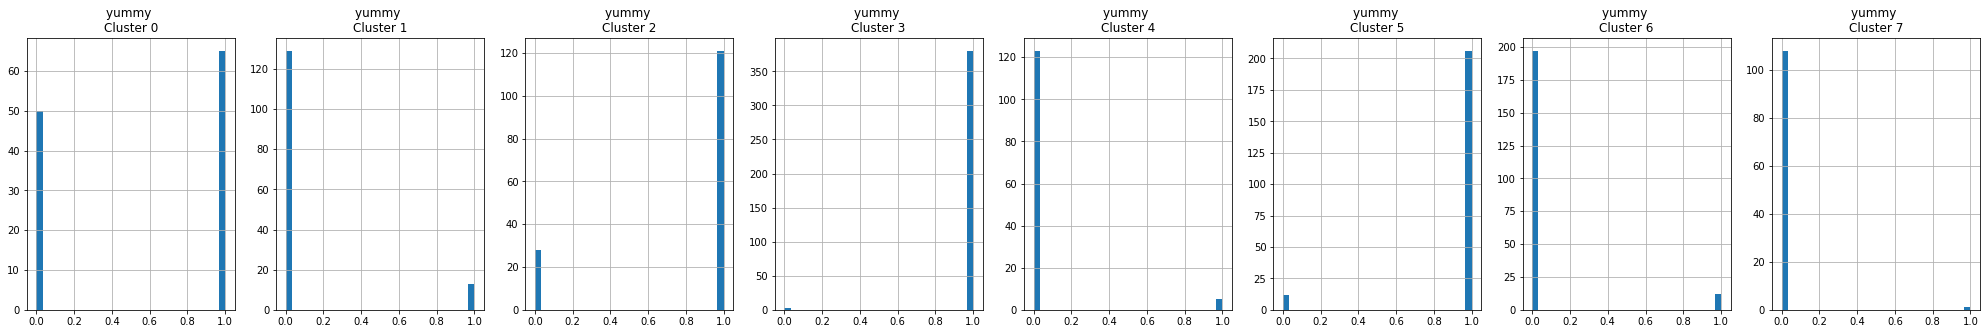

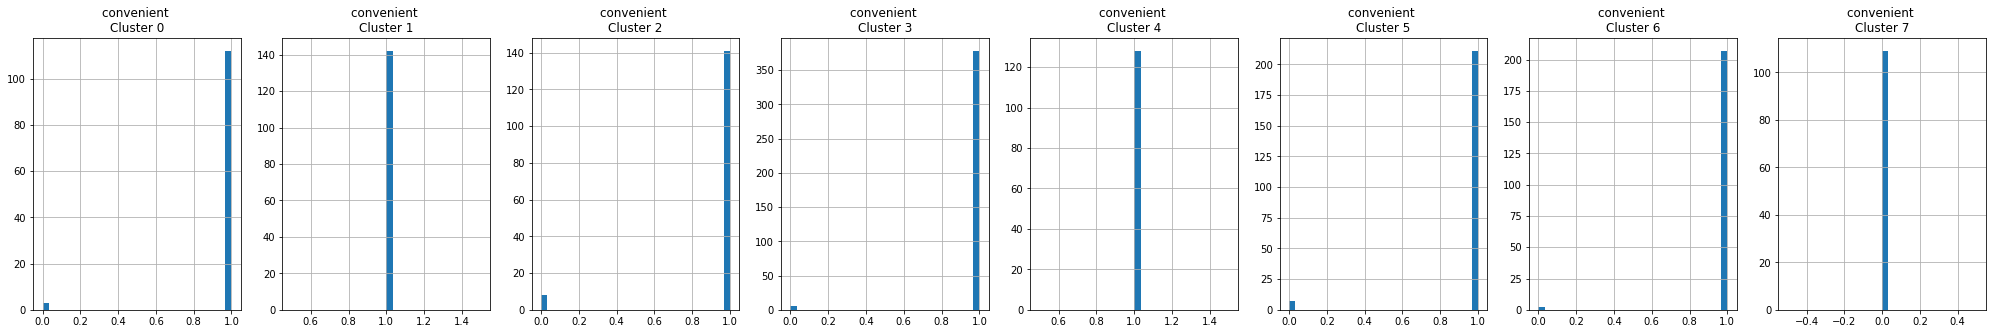

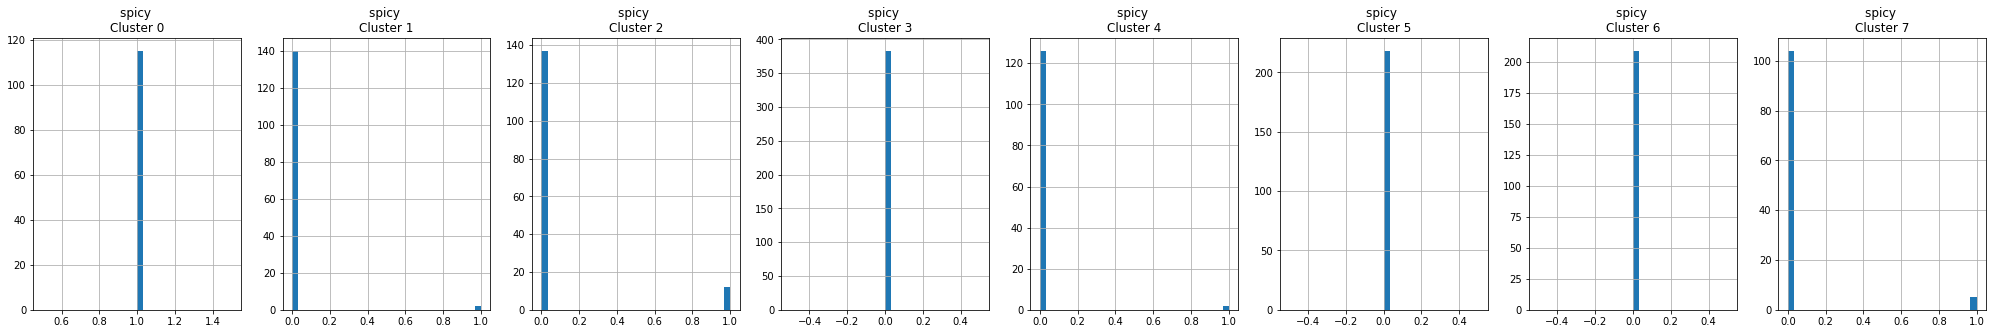

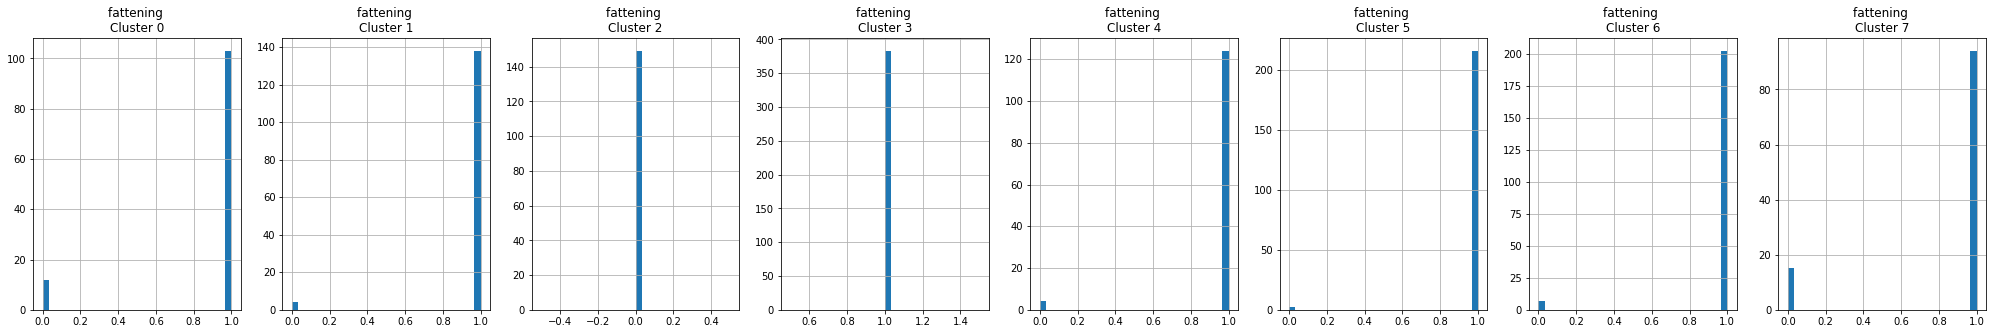

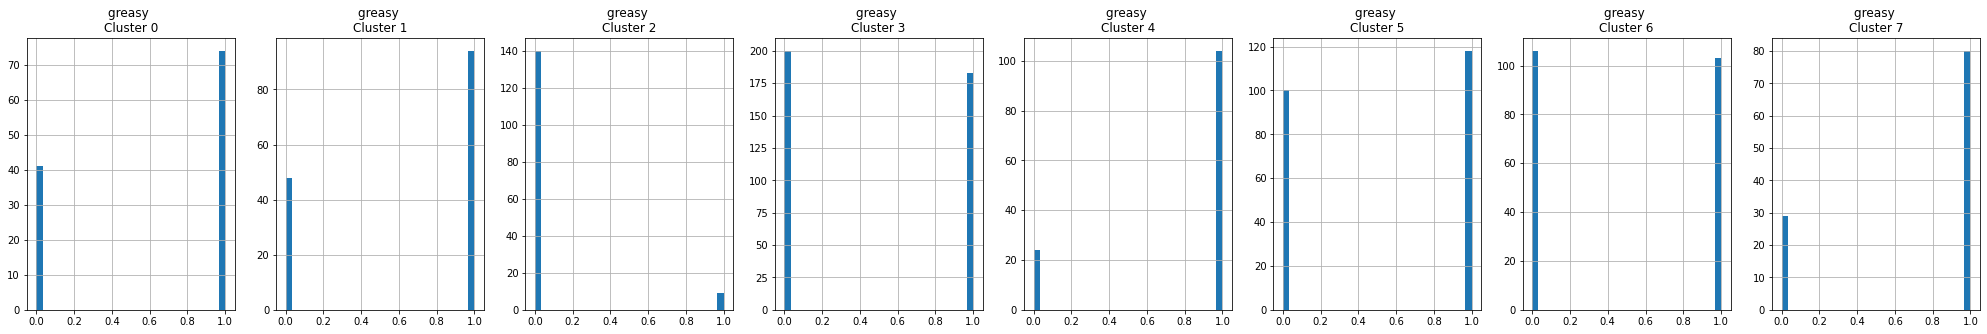

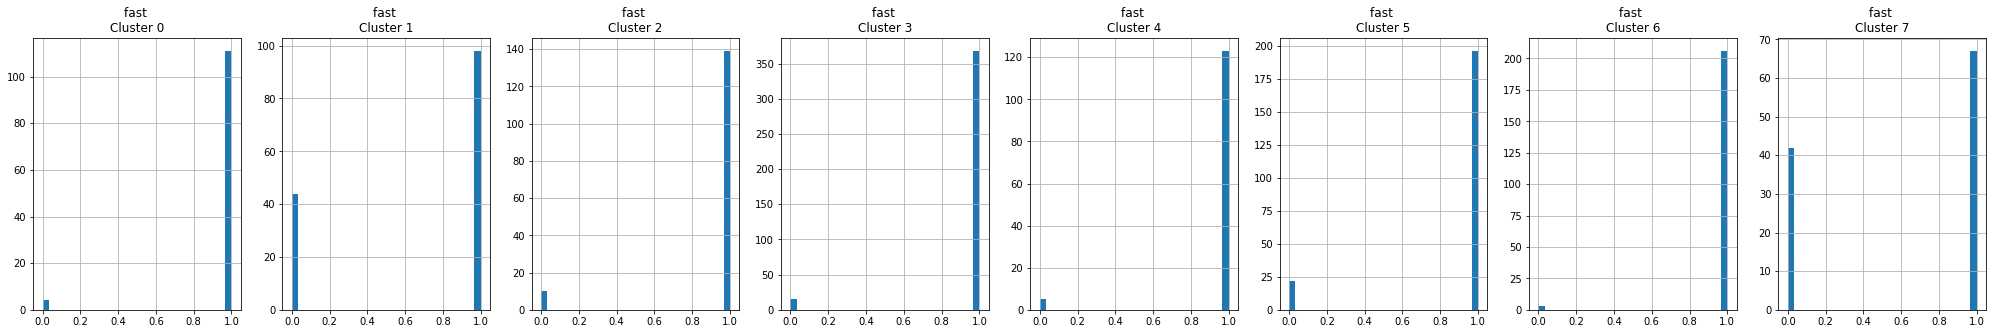

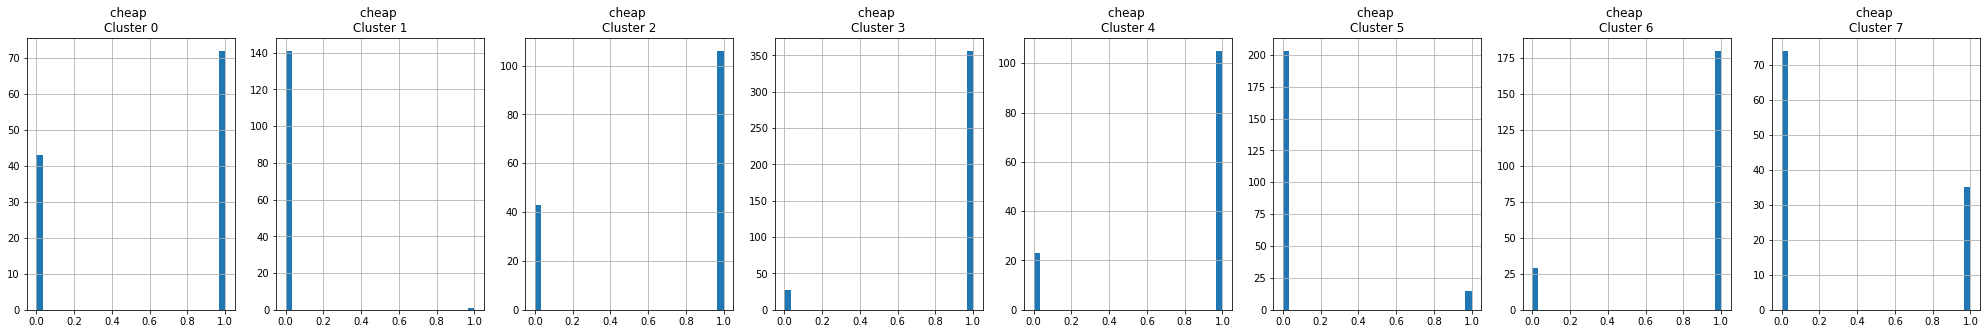

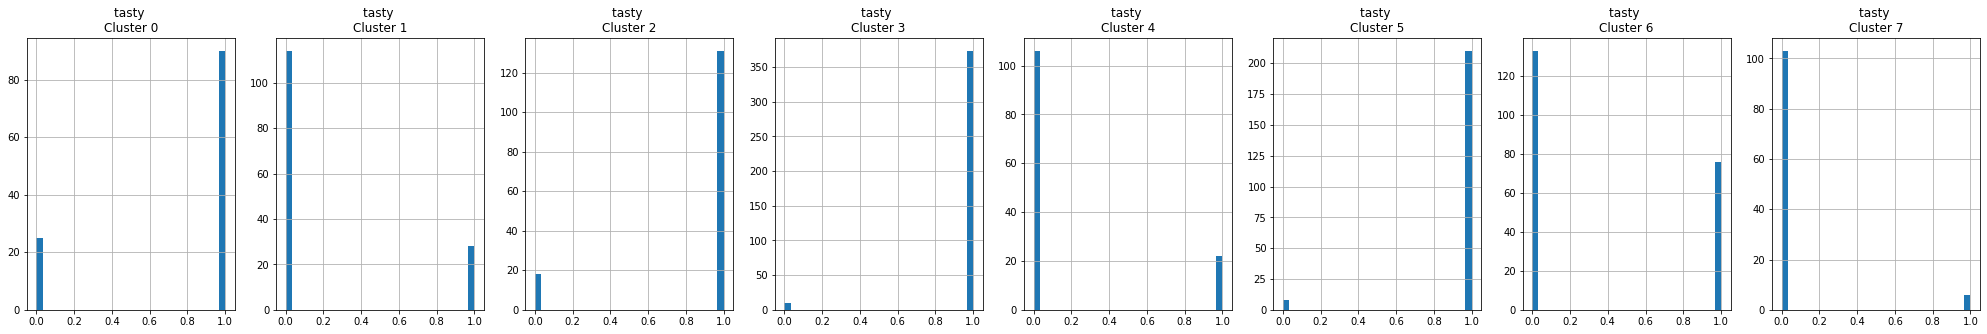

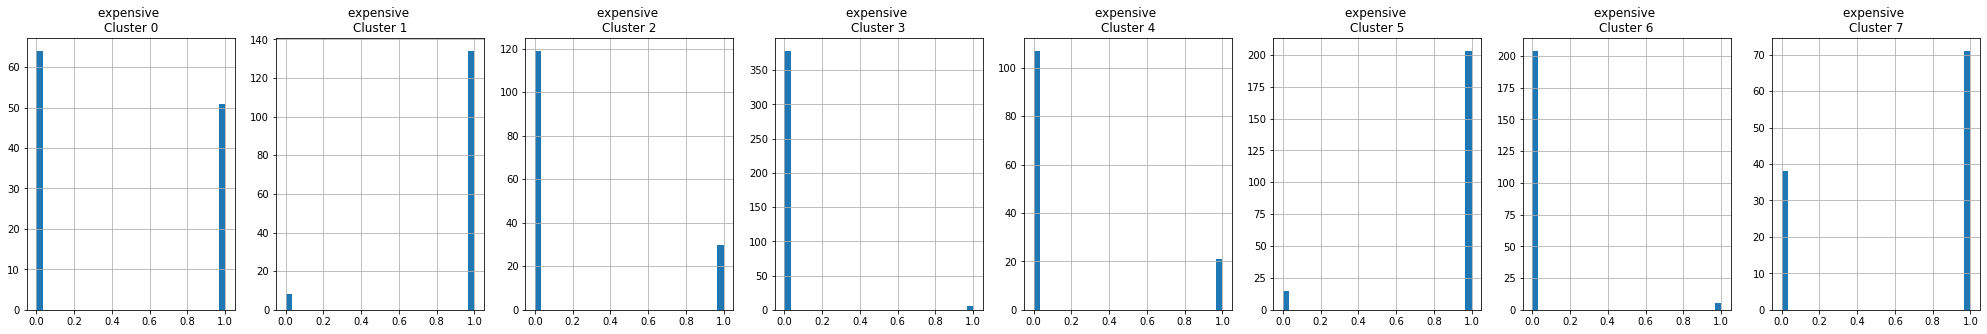

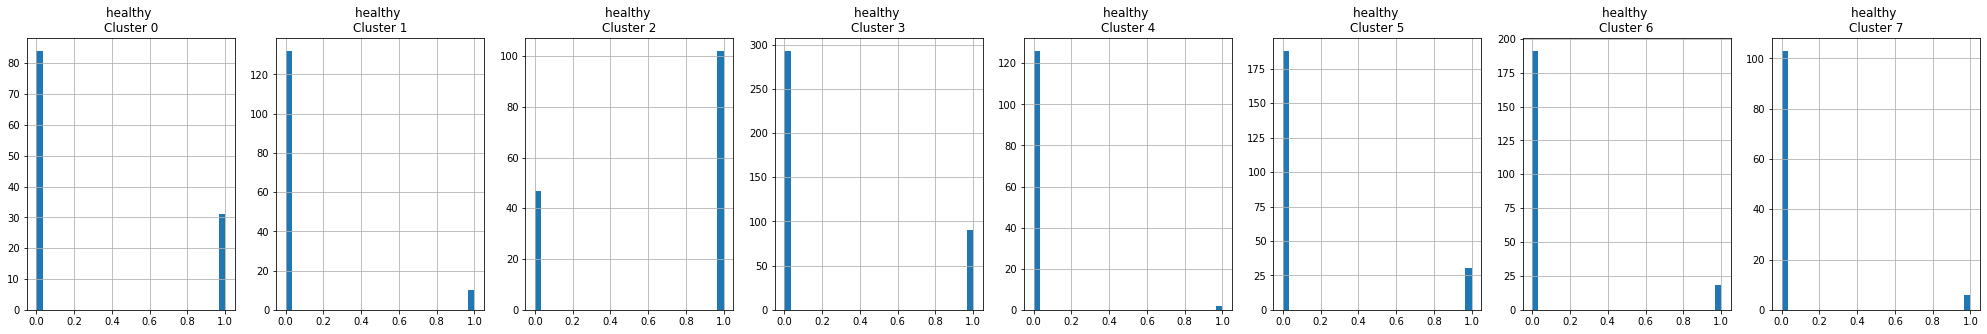

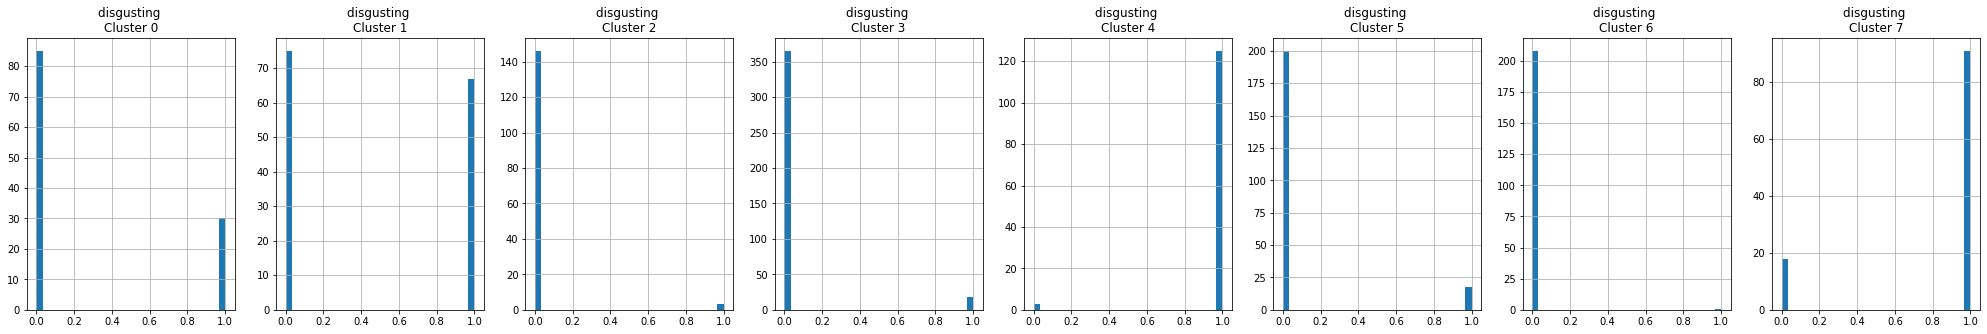

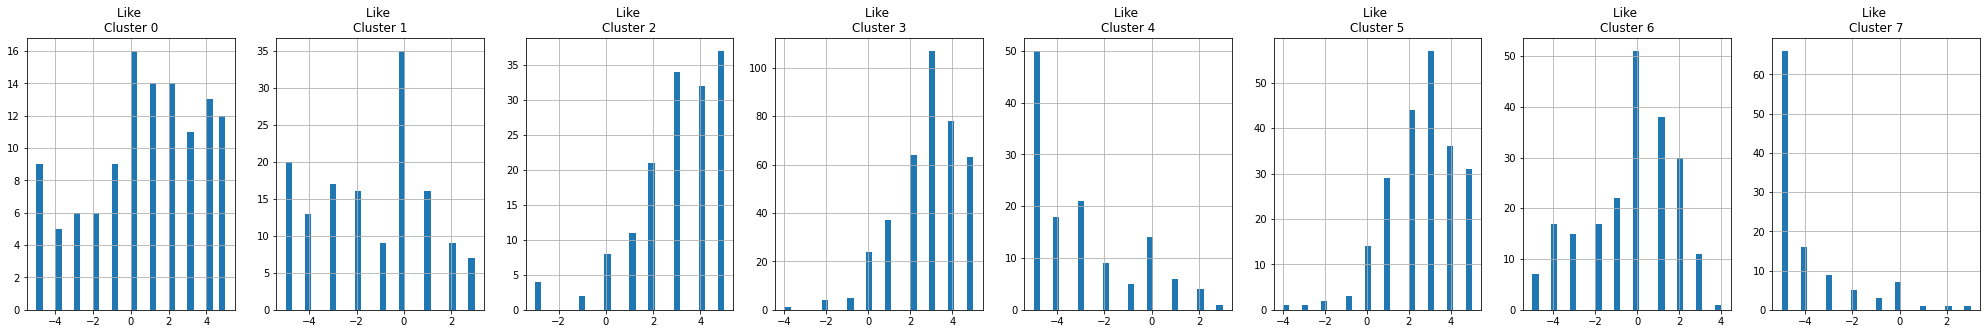

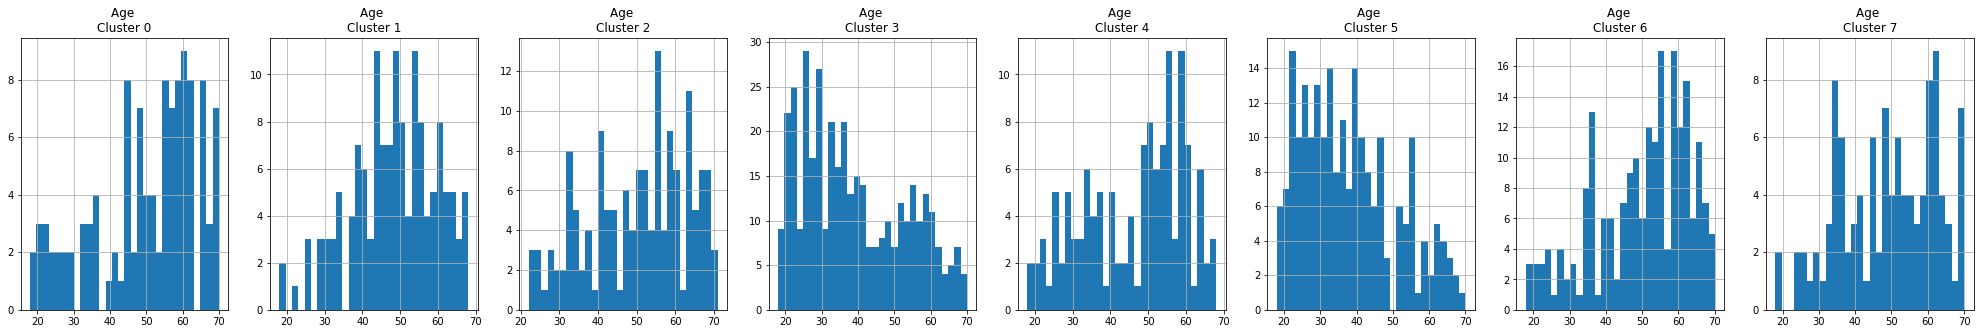

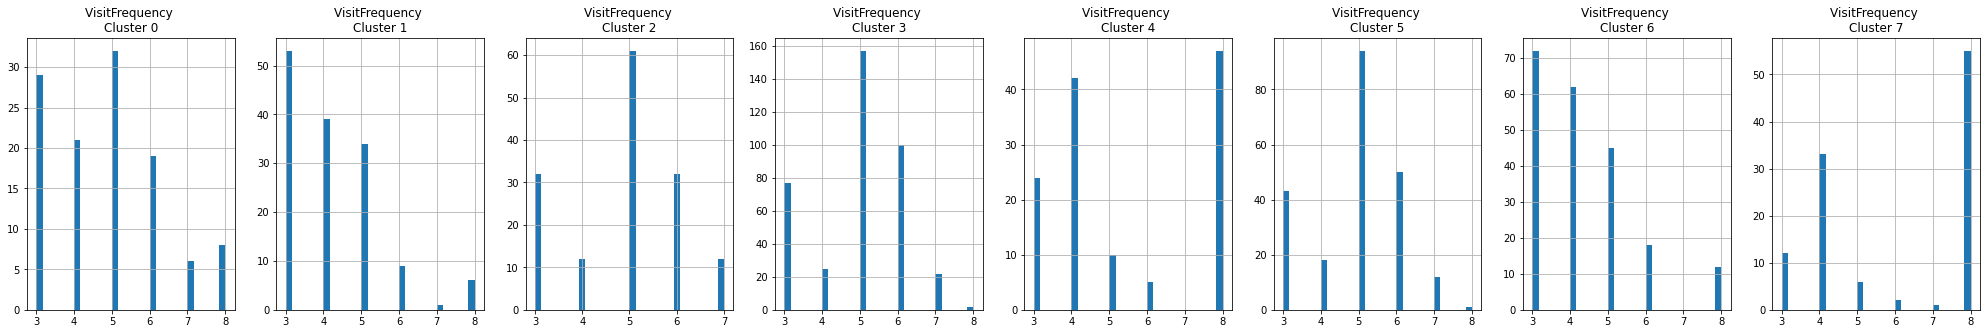

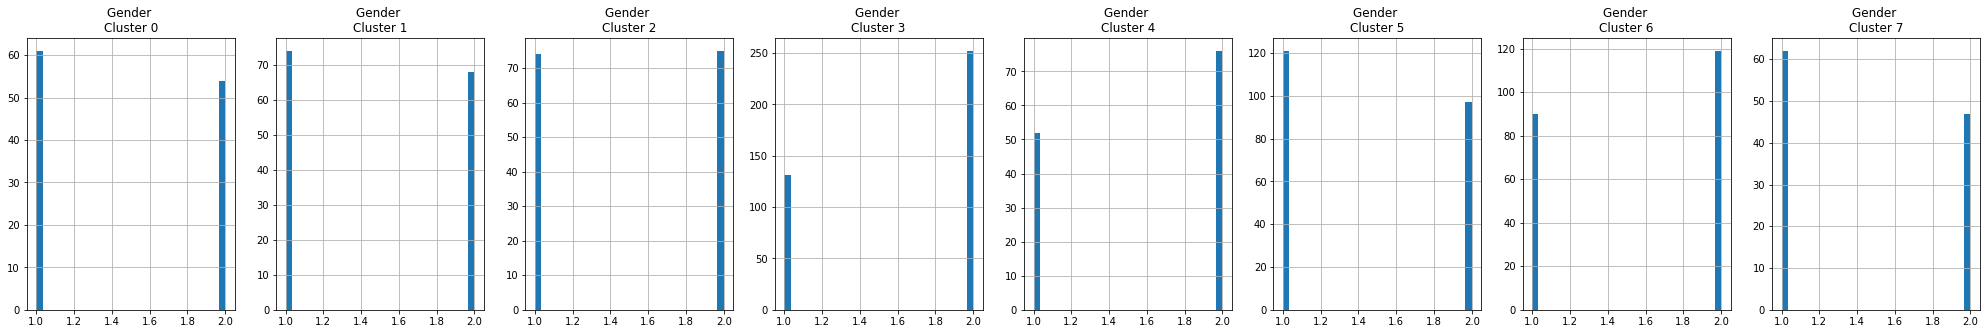

In [174]:
# Plot the histogram of various clusters (one cluster = one column with all features)
for feature in data.columns:
  plt.figure(figsize=(35,5))  
  for centroid in range(8):
    plt.subplot(1,8,centroid+1)
    cluster = data_with_centroids[data_with_centroids.centroid==centroid]
    cluster[feature].hist(bins=30)
    plt.title(f'{feature} \nCluster {centroid}')
plt.show()

In [175]:
cluster_centroids = scaler.inverse_transform(cluster_centers)
cluster_centroids.shape

(8, 15)

###understading the different segments determined with Kmeans

In [176]:
#characteristics of the different clusters using their centroids
cluster_centroids = scaler.inverse_transform(cluster_centers)
cluster_centroids = pd.DataFrame(data=cluster_centroids, columns=[data.columns])
cluster_centroids

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0.565217,9.739130e-01,1.000000e+00,8.956522e-01,0.643478,0.965217,0.626087,0.782609,0.443478,0.269565,0.260870,0.721739,50.104348,4.791304,1.469565
1,0.091549,1.000000e+00,1.408451e-02,9.718310e-01,0.661972,0.690141,0.007042,0.197183,0.943662,0.070423,0.471831,-1.330986,48.105634,4.183099,1.478873
2,0.812081,9.463087e-01,8.053691e-02,1.221245e-15,0.060403,0.932886,0.711409,0.879195,0.201342,0.684564,0.020134,3.046980,50.060403,4.865772,1.503356
3,0.992167,9.869452e-01,-2.636780e-16,1.000000e+00,0.477807,0.960836,0.929504,0.973890,0.013055,0.234987,0.046997,2.861619,38.757180,4.924282,1.657963
4,0.039063,1.000000e+00,1.562500e-02,9.687500e-01,0.812500,0.960938,0.820312,0.171875,0.164063,0.015625,0.976562,-3.054688,46.109375,5.437500,1.593750
5,0.944954,9.678899e-01,6.938894e-17,9.908257e-01,0.541284,0.899083,0.068807,0.963303,0.931193,0.137615,0.082569,2.628440,37.729358,4.876147,1.444954
6,0.057416,9.904306e-01,1.110223e-16,9.665072e-01,0.492823,0.985646,0.861244,0.363636,0.023923,0.086124,0.004785,-0.330144,49.928230,4.272727,1.569378
7,0.009174,-2.220446e-16,4.587156e-02,8.623853e-01,0.733945,0.614679,0.321101,0.055046,0.651376,0.055046,0.834862,-3.926606,49.110092,6.027523,1.431193


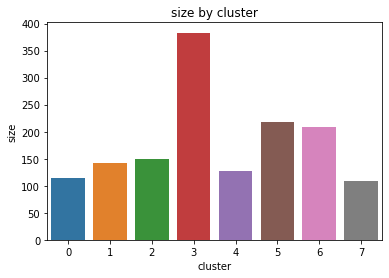

In [177]:
cluster_size = []
for centroid, cluster_df in data_with_centroids.groupby("centroid"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('size by cluster')
plt.show()